# Analyze traffic accident data to identify patterns related to road conditions, weather and time of the day. Visualize accident hotspots and contributing factors.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Traffic.csv")
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [4]:
df.shape

(2976, 9)

In [5]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [6]:
df.describe(include="all")

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
count,2976,2976.000000,2976,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976
unique,96,NaN,7,NaN,NaN,NaN,NaN,NaN,4
top,12:00:00 AM,NaN,Tuesday,NaN,NaN,NaN,NaN,NaN,normal
freq,31,NaN,480,NaN,NaN,NaN,NaN,NaN,1669
mean,NaN,16.000000,NaN,68.696573,14.917339,15.279570,15.324933,114.218414,NaN
std,NaN,8.945775,NaN,45.850693,12.847518,14.341986,10.603833,60.190627,NaN
min,NaN,1.000000,NaN,6.000000,0.000000,0.000000,0.000000,21.000000,NaN
25%,NaN,8.000000,NaN,19.000000,5.000000,1.000000,6.000000,55.000000,NaN
50%,NaN,16.000000,NaN,64.000000,12.000000,12.000000,14.000000,109.000000,NaN
75%,NaN,24.000000,NaN,107.000000,22.000000,25.000000,23.000000,164.000000,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


# EXPLORATORY DATA ANALYSIS

In [8]:
df.duplicated().sum()

0

In [10]:
df['Traffic Situation'].value_counts()

normal    1669
heavy      682
high       321
low        304
Name: Traffic Situation, dtype: int64

Text(0.5, 1.0, 'Distribution of Traffic Situation')

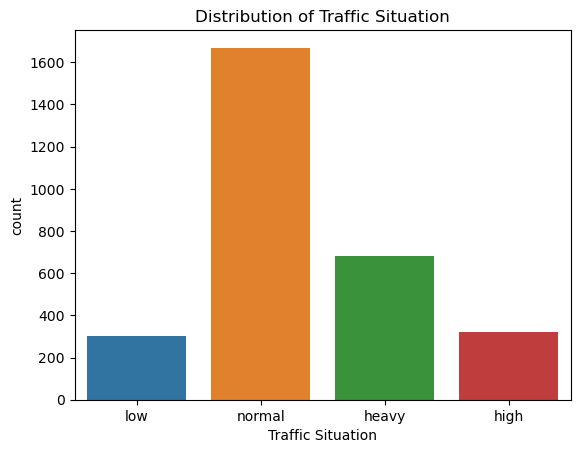

In [13]:
sns.countplot(x = df['Traffic Situation'])
plt.title('Distribution of Traffic Situation')

In [15]:
df.isna().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [16]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [17]:
categorical=[i for i in df.columns if df[i].dtype=='O']
print('The categorical variables are',categorical)

The categorical variables are ['Time', 'Day of the week', 'Traffic Situation']


In [18]:
for i in categorical:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [19]:
df.isna().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

# DATA VISUALIZATION

<Axes: xlabel='BusCount', ylabel='CarCount'>

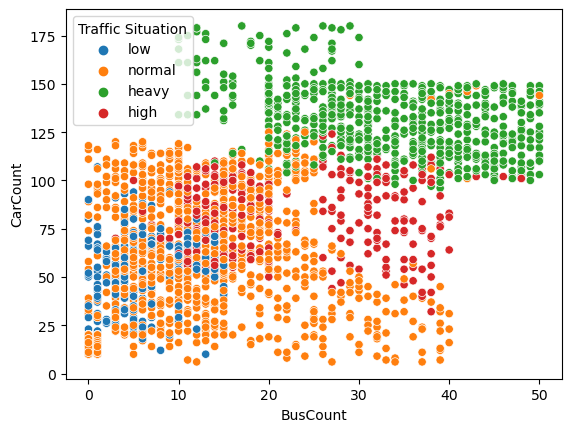

In [20]:
sns.scatterplot(x=df['BusCount'], y=df['CarCount'], hue=df['Traffic Situation'])

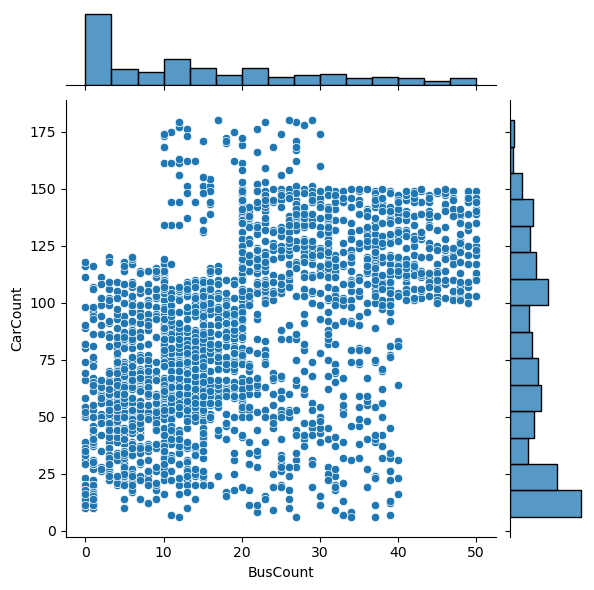

In [21]:
sns.jointplot(x='BusCount',y='CarCount',data=df)

In [22]:
df.corr()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
Date,1.000000,-0.013453,-0.005089,-0.015536,0.024734,-0.010679
CarCount,-0.013453,1.000000,0.722539,0.692994,-0.628157,0.970443
BikeCount,-0.005089,0.722539,1.000000,0.566364,-0.575399,0.797429
BusCount,-0.015536,0.692994,0.566364,1.000000,-0.546931,0.790705
TruckCount,0.024734,-0.628157,-0.575399,-0.546931,1.000000,-0.555471
Total,-0.010679,0.970443,0.797429,0.790705,-0.555471,1.000000


<Axes: >

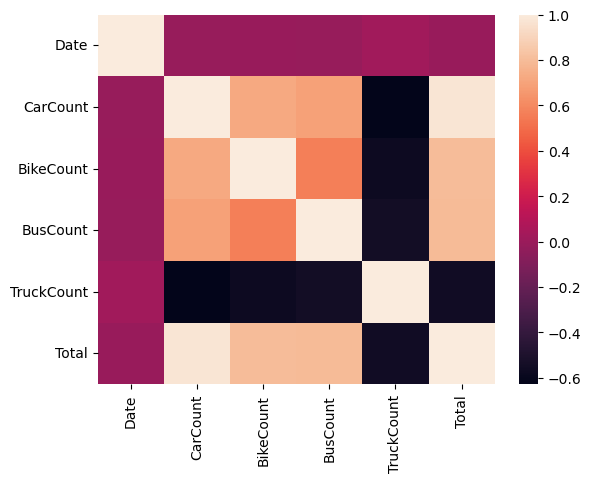

In [23]:
sns.heatmap(df.corr())

In [24]:
numerical=[i for i in df.columns if df[i].dtype!='O']
print('The numerica variables are',numerical)

The numerica variables are ['Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']


ValueError: num must be an integer with 1 <= num <= 4, not 5

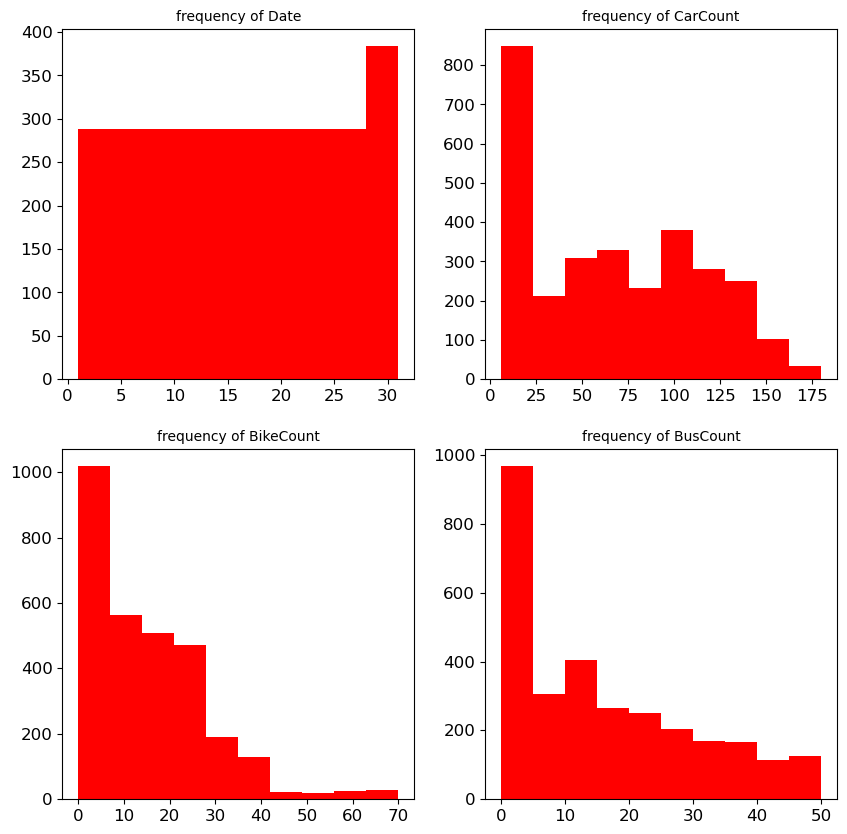

In [26]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in numerical:
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(2,2,plotnumber)
        plt.hist(df[i],color='red')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title('frequency of '+i, fontsize=10)
    plotnumber +=1

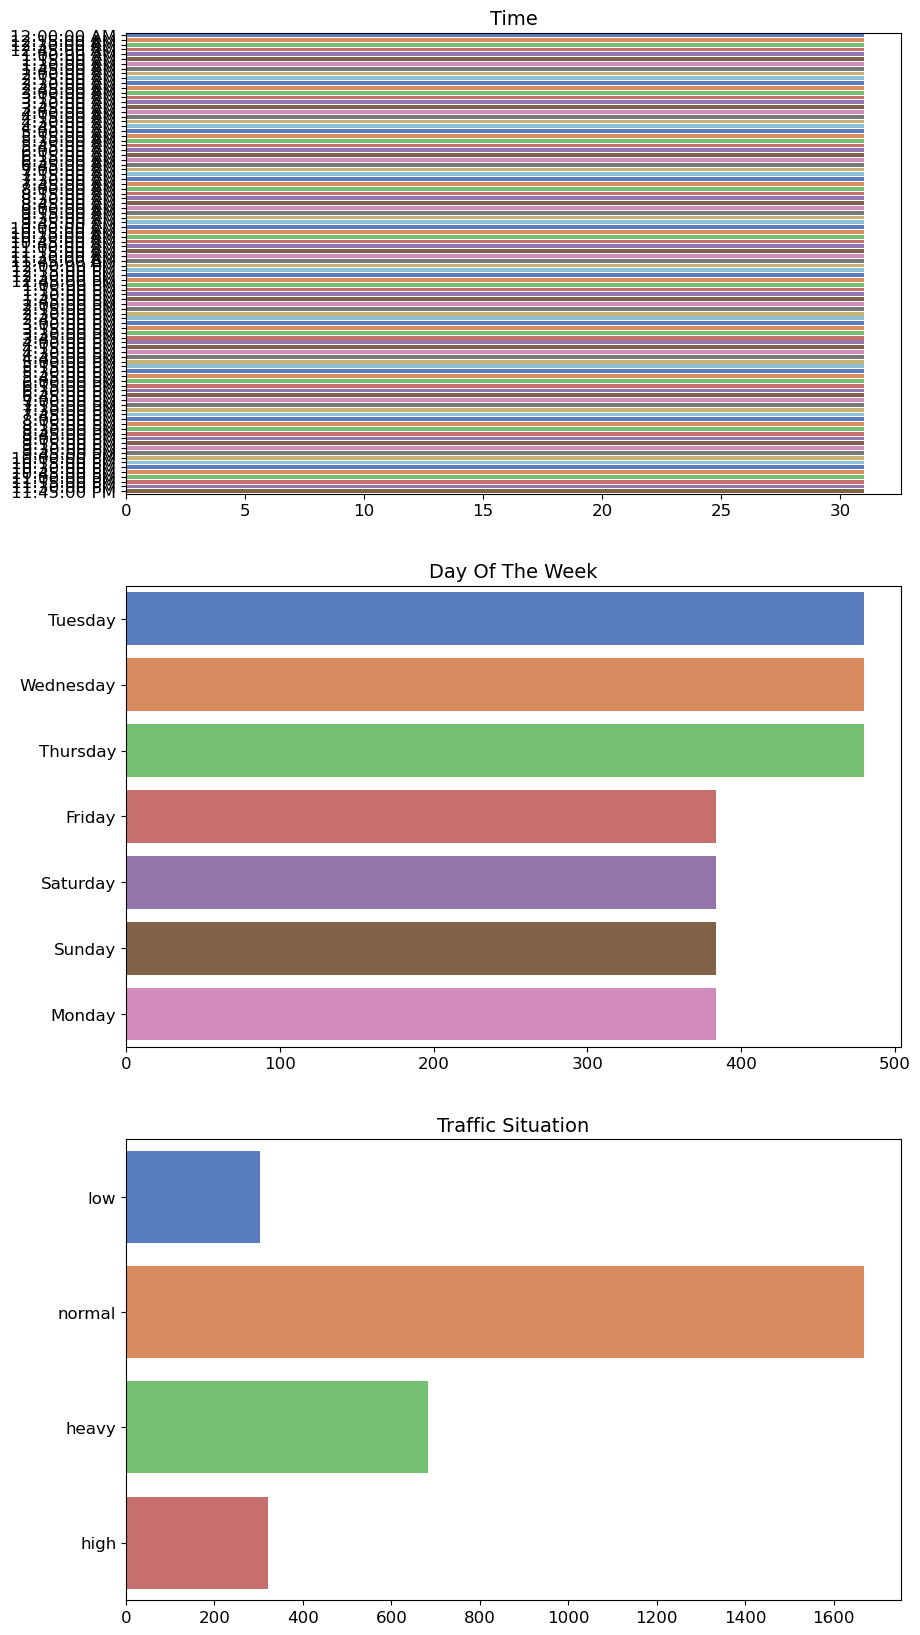

In [30]:
plt.figure(figsize=(10,200))
plotnumber = 1

for col in categorical:
    if plotnumber <= df.shape[1] and col!='BikeCount':
        ax1 = plt.subplot(28,1,plotnumber)
        sns.countplot(data=df, y=col, palette='muted')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1

# HANDLING CATEGORICAL VALUES

In [28]:
df.dtypes

Time                 object
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#creating a new data frame from performing the chi2 analysis
df1=pd.DataFrame()

#adding all the categorical columns except the output to new data frame
for i in categorical:
    if i!= 'Traffic Situation':
        df1[i]=le.fit_transform(df[i])

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Time             2976 non-null   int32
 1   Day of the week  2976 non-null   int32
dtypes: int32(2)
memory usage: 23.4 KB


<Axes: >

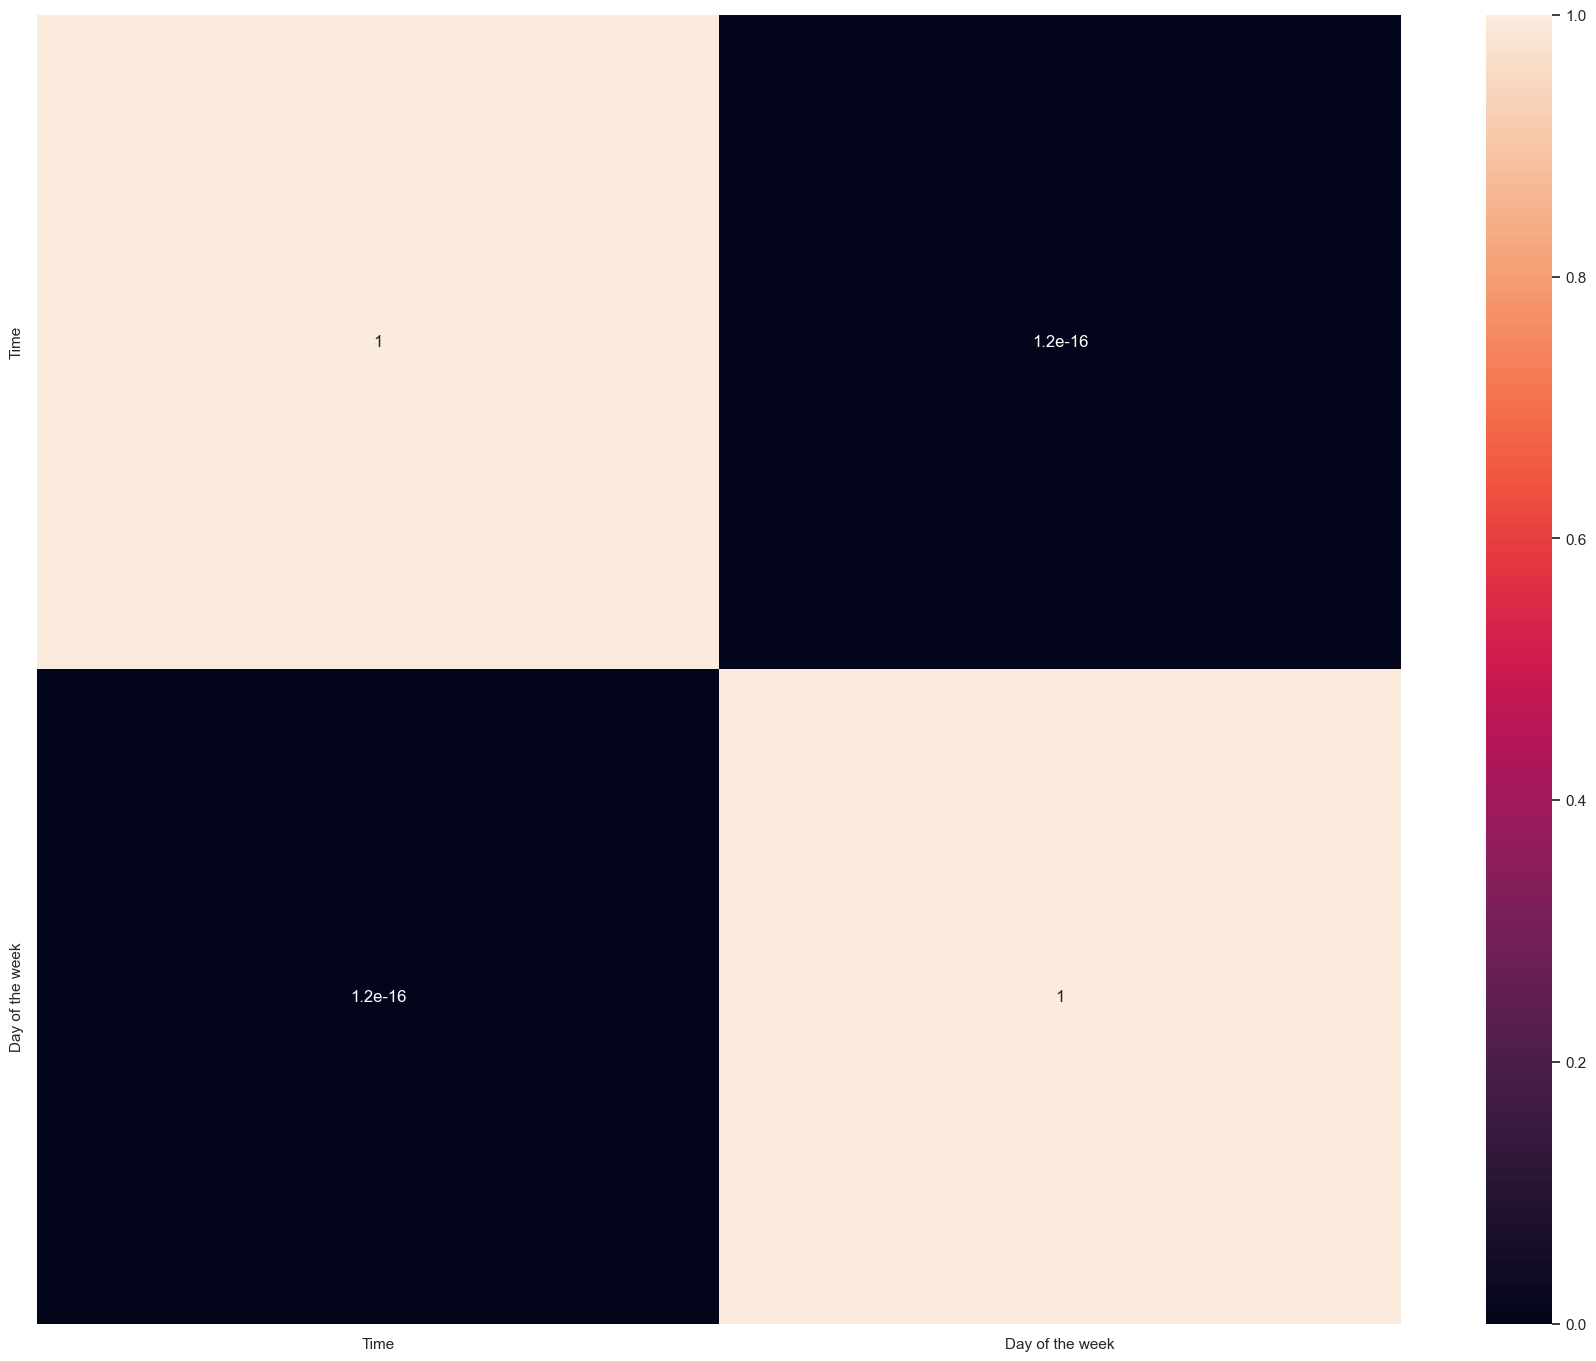

In [33]:
plt.figure(figsize=(22,17))
sns.set(font_scale=1)
sns.heatmap(df1.corr(), annot=True)

In [34]:
df1.head()

,Time,Day of the week
0,16,5
1,18,5
2,20,5
3,22,5
4,24,5


In [35]:
from sklearn.feature_selection import chi2
f_p_values=chi2(df1,df['Traffic Situation'])

In [36]:
f_p_values

(array([7855.64032684,  127.60667394]),
 array([0.00000000e+00, 1.77338828e-27]))

In [37]:
f_p_values1=pd.DataFrame({'features':df1.columns, 'Fscore': f_p_values[0], 'Pvalues':f_p_values[1]})
f_p_values1

,features,Fscore,Pvalues
0,Time,7855.640327,0.000000e+00
1,Day of the week,127.606674,1.773388e-27


In [46]:
f_p_values1.sort_values(by='Pvalues',ascending=True)

,features,Fscore,Pvalues
0,Time,7855.640327,0.000000e+00
1,Day of the week,127.606674,1.773388e-27


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)